In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_excel('main_data_for_working.xlsx')
df.drop(columns='Unnamed: 0',inplace=True)
df

,SA,TPV,MPV,C,H,N,O *,P(Bar),T,CO2
0,645.0,0.26,0.25,70.86,1.71,3.19,14.72,0.15,25,1.43
1,750.0,0.30,0.29,83.88,1.63,3.27,5.30,0.15,25,1.46
2,1259.0,0.52,0.49,87.56,1.06,1.87,9.51,0.15,25,1.36
3,1476.0,0.61,0.60,91.62,0.80,1.67,5.91,0.15,25,1.30
4,1692.0,0.71,0.68,94.51,0.58,1.51,3.40,0.15,25,1.20
...,...,...,...,...,...,...,...,...,...,...
397,1165.0,1.03,0.91,64.70,1.50,10.40,23.25,1.00,0,5.30
398,2693.0,1.68,0.56,84.80,0.50,6.20,8.21,1.00,0,4.70
399,2731.0,1.89,1.12,86.80,1.80,2.60,7.90,1.00,0,4.10
400,2799.0,1.91,1.12,91.90,1.20,1.60,4.45,1.00,0,4.00


In [4]:
X=df.drop(columns=['CO2'])
Y=df['CO2']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
# test_size define test size of dataset (20% of dataset)
#80% for training of dataset

# GRADIENT BOOSTING

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=40)

In [6]:
model.fit(X_train, y_train)    #fitting our training datset in our  model

GradientBoostingRegressor(random_state=40)

In [7]:
y_pred=model.predict(X_test)   #we are evaluating the test dataset  

In [8]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)   #R-squared value for gradient boosting for Test Data

0.8204775489125578

In [9]:
y_pred1=model.predict(X_train)

In [10]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred1)   #R-squared value for gradient boosting for Training Data

0.9439864494417677

Text(0.5, 1.0, 'GRADIENT BOOSTING')

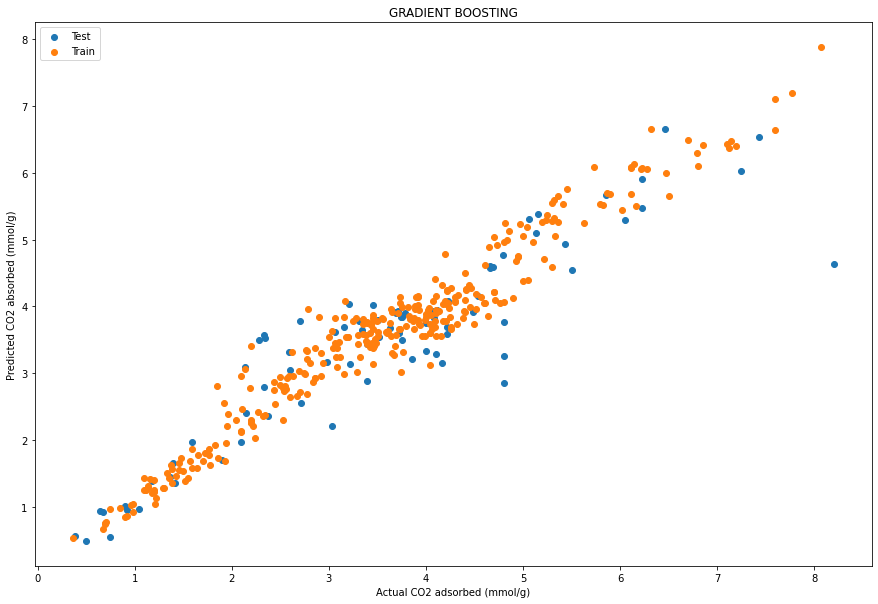

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred,label='Test')
plt.scatter(y_train, y_pred1,label='Train')
plt.legend()
plt.plot(y)
plt.xlabel("Actual CO2 adsorbed (mmol/g)")
plt.ylabel("Predicted CO2 absorbed (mmol/g)")
plt.title("GRADIENT BOOSTING")

# XGBoost

In [10]:
# import xgboost

In [17]:
from xgboost import XGBRegressor
model = XGBRegressor(objective='reg:squarederror',max_depth=5)
model.fit(X_train, y_train)     #fitting our training datset in our  model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [22]:
y2_pred=model.predict(X_test)   #we are evaluating the test dataset 
r2_score(y_test,y2_pred)        #R-squared value for extreme gradient boosting for Test Data

0.7904632994025973

In [23]:
y2_pred1=model.predict(X_train)
from sklearn.metrics import r2_score
r2_score(y_train, y2_pred1)   #R-squared value for extreme gradient boosting for Training Data

0.9997758232643305

Text(0.5, 1.0, 'XTREAM GRADIENT BOOSTING')

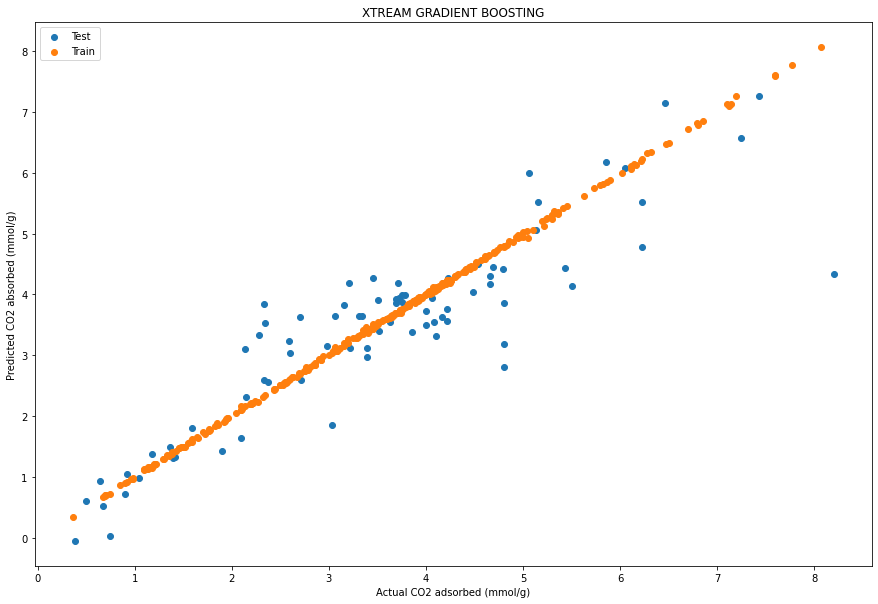

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y2_pred,label='Test')
plt.scatter(y_train, y2_pred1,label='Train')
plt.legend()
plt.xlabel("Actual CO2 adsorbed (mmol/g)")
plt.ylabel("Predicted CO2 absorbed (mmol/g)")
plt.title("XTREAM GRADIENT BOOSTING")

# LGBoost

In [26]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(random_state=5)
model.fit(X_train, y_train)       #fitting our training datset in our  model

LGBMRegressor(random_state=5)

In [27]:
y3_pred=model.predict(X_test)     #we are evaluating the test dataset 
r2_score(y_test,y3_pred)          #R-squared value for Light gradient boosting for Test Data

0.834569623969357

In [28]:
y3_pred1=model.predict(X_train)

In [29]:
from sklearn.metrics import r2_score
r2_score(y_train, y3_pred1)   #R-squared value for Light gradient boosting for Training Data

0.9540485338901844

Text(0.5, 1.0, 'LIGHT GRADIENT BOOSTING')

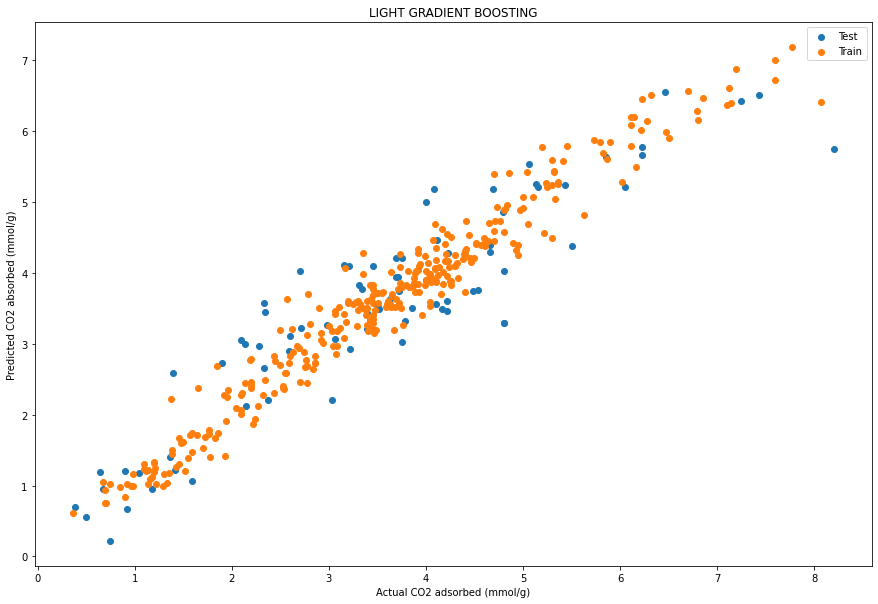

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y3_pred,label='Test')
plt.scatter(y_train, y3_pred1,label='Train')
plt.legend()
plt.xlabel("Actual CO2 adsorbed (mmol/g)")
plt.ylabel("Predicted CO2 absorbed (mmol/g)")
plt.title("LIGHT GRADIENT BOOSTING")

# K-Fold Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score

In [110]:
cross_val_score(GradientBoostingRegressor(n_estimators=42),X,Y)

array([-1.15462765,  0.39022589,  0.16213004,  0.33144595,  0.52964428])

In [111]:
cross_val_score(XGBRegressor(n_estimators=5),X,Y)

array([-0.4112235 ,  0.31162577, -1.11368824, -0.36867906,  0.15505047])

In [112]:
cross_val_score(LGBMRegressor(n_estimators=42),X,Y)

array([-1.30234425,  0.50787264,  0.14397871,  0.34990319, -0.40607863])